## Spam Dectection Project of ML

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spams.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
976,ham,Ok i shall talk to him,NaN,NaN,NaN
2617,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
4002,ham,somewhere out there beneath the pale moon ligh...,NaN,NaN,NaN
1055,ham,I'm at work. Please call,NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1.  Data Cleaning

In [6]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df= df.rename(columns={'v1':'label','v2':'feature'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   feature  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [10]:
df.head()

,label,feature
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isna().sum()

label      0
feature    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df=df.drop_duplicates(keep = 'first')

In [14]:
df.shape

(5169, 2)

In [15]:
df.duplicated().sum()

np.int64(0)

## 2. EDA

In [16]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

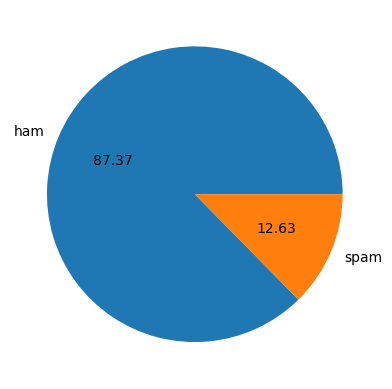

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels = ['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\icc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_char']= df['feature'].apply(len)

In [22]:
df.head()

,label,feature,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_word']=df['feature'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,label,feature,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['feature'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,feature,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.894177,18.456568,1.966531
std,58.162207,13.325487,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['label']==0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.424048,17.123561,1.820195
std,56.337668,13.493783,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['label']==1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.471669,27.675345,2.978560
std,30.019848,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

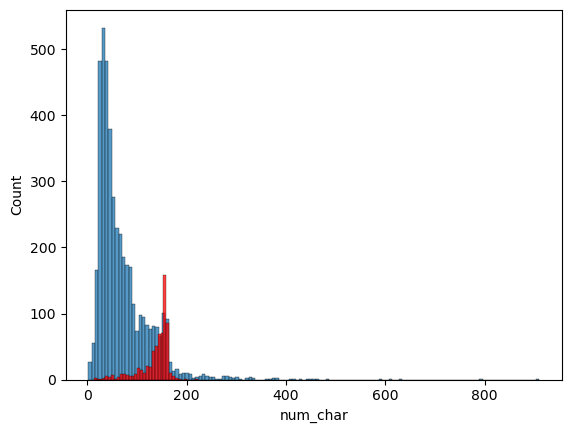

In [31]:
sns.histplot(df[df['label']==0]['num_char'])
sns.histplot(df[df['label']==1]['num_char'],color = 'red')

<Axes: xlabel='num_word', ylabel='Count'>

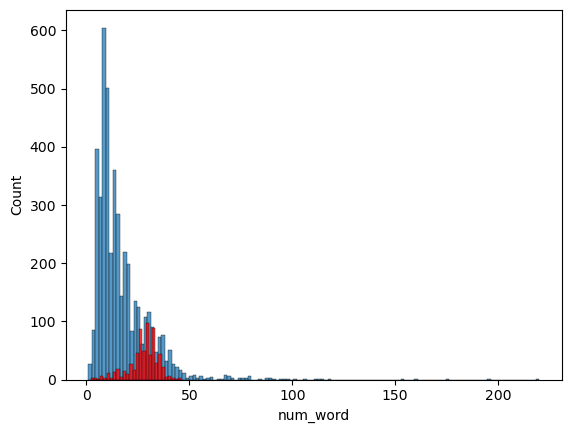

In [32]:
sns.histplot(df[df['label']==0]['num_word'])
sns.histplot(df[df['label']==1]['num_word'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

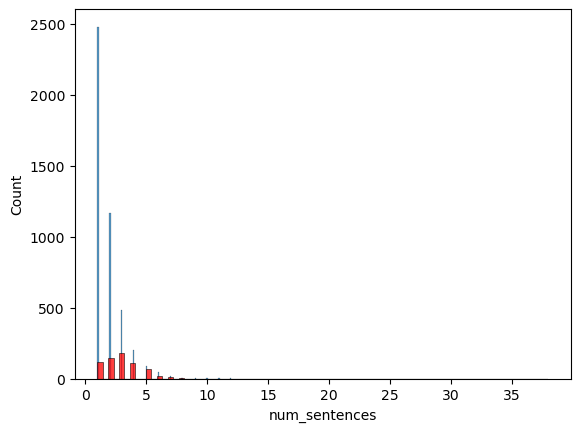

In [33]:
sns.histplot(df[df['label']==0]['num_sentences'])
sns.histplot(df[df['label']==1]['num_sentences'],color = 'red')

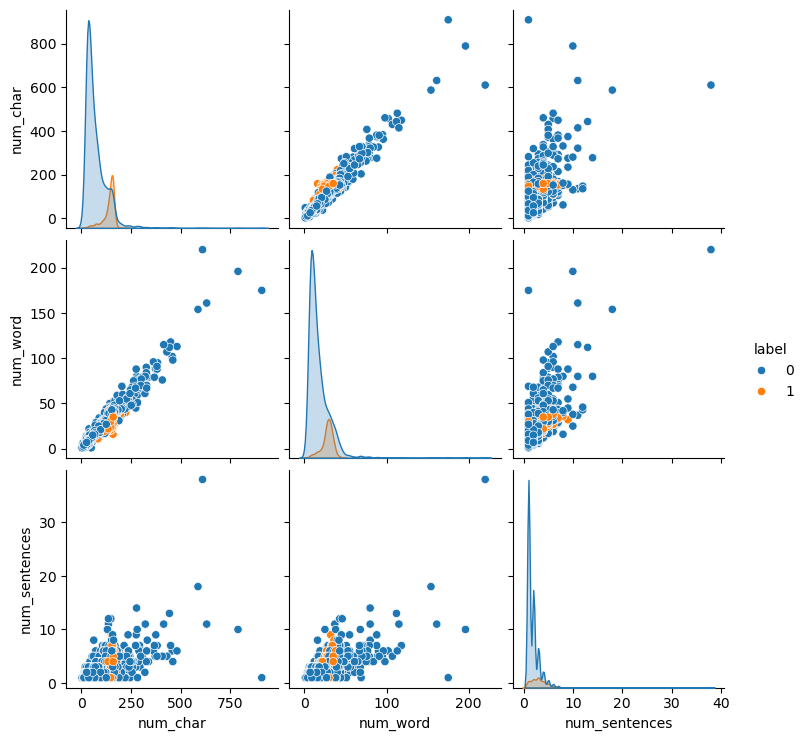

In [34]:
sns.pairplot(df,hue = 'label')

In [35]:
df2 = df.drop('feature',axis = 1)

<Axes: >

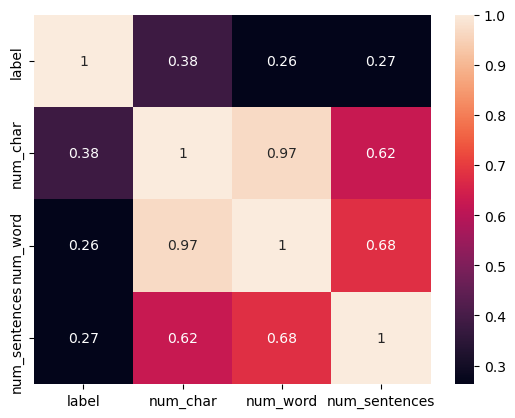

In [36]:
sns.heatmap(df2.corr(),annot = True)


# 3. Data Preprocessing
#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

In [37]:

from nltk.corpus import stopwords


In [38]:
import string

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
from nltk.stem.porter import PorterStemmer
ps =  PorterStemmer()

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [42]:
transform_text('hey i am Muntazir . I am buliding project.')

'hey muntazir bulid project'

In [43]:
df['transform_text']=df['feature'].apply(transform_text)

In [44]:
df.head()

,label,feature,num_char,num_word,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['label']==1]['transform_text'].str.cat(sep=' '))

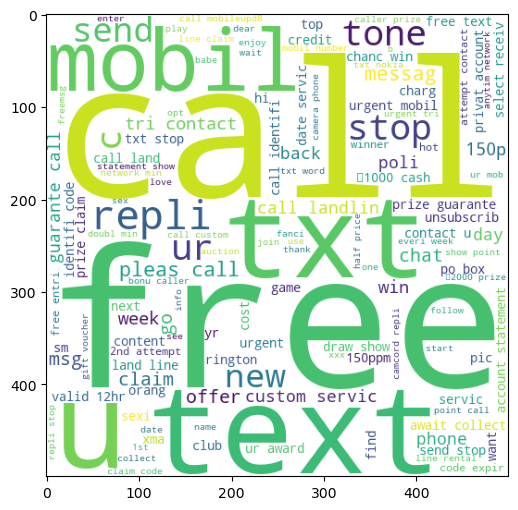

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=' '))

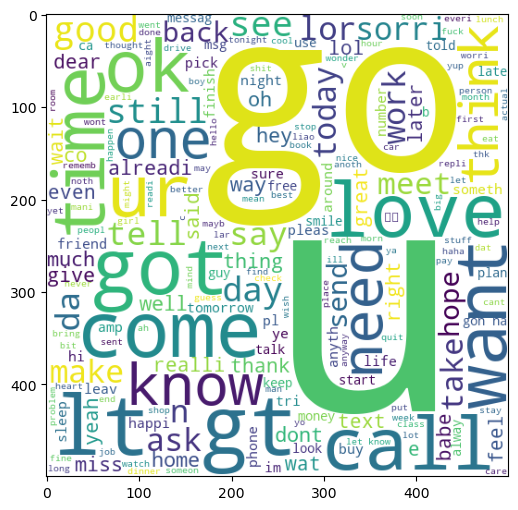

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# 4. Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [53]:
X.shape

(5169, 3000)

In [54]:
y = df['label'].values

In [55]:

from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 125]
 [ 19 121]]
0.491869918699187


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[894   0]
 [ 31 109]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[893   1]
 [ 20 120]]
0.9917355371900827
